In [1]:
import tensorflow as tf
import time

/home/aewin/work/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

with tf.Session() as sess:
    result = sess.run(sum_result)
print('result=',result)    

result= 9961.622


In [3]:
size=500
W = tf.random_normal([size, size],name='W')
X = tf.random_normal([size, size],name='X')
mul = tf.matmul(W, X,name='mul')
sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [4]:
size=500
with tf.device("/cpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [5]:
size=500
with tf.device("/gpu:0"):
    W = tf.random_normal([size, size],name='W')
    X = tf.random_normal([size, size],name='X')
    mul = tf.matmul(W, X,name='mul')
    sum_result = tf.reduce_sum(mul,name='sum')

tfconfig=tf.ConfigProto(log_device_placement=True)
with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)

In [6]:
def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size],name='W')
        X = tf.random_normal([size, size],name='X')
        mul = tf.matmul(W, X,name='mul')
        sum_result = tf.reduce_sum(mul,name='sum')

    startTime = time.time() 
    tfconfig=tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
    takeTimes=time.time()  - startTime   
    print(device_name," size=",size,"Time:",takeTimes )
    return takeTimes

In [7]:
g=performanceTest("/gpu:0",100)
c=performanceTest("/cpu:0",100)

/gpu:0  size= 100 Time: 0.007662057876586914
/cpu:0  size= 100 Time: 0.0075452327728271484


In [8]:
g=performanceTest("/gpu:0",200)
c=performanceTest("/cpu:0",200)


/gpu:0  size= 200 Time: 0.007742404937744141
/cpu:0  size= 200 Time: 0.012971162796020508


In [9]:
g=performanceTest("/gpu:0",1000)
c=performanceTest("/cpu:0",1000)


/gpu:0  size= 1000 Time: 0.009371757507324219
/cpu:0  size= 1000 Time: 0.02425360679626465


In [10]:
g=performanceTest("/gpu:0",5000)
c=performanceTest("/cpu:0",5000)


/gpu:0  size= 5000 Time: 0.04298114776611328
/cpu:0  size= 5000 Time: 0.5044822692871094


In [11]:
gpu_set=[];cpu_set=[];i_set=[]
for i in range(0,15001,500):
    g=performanceTest("/gpu:0",i)
    c=performanceTest("/cpu:0",i)
    gpu_set.append(g);cpu_set.append(c);i_set.append(i)
    print("--")

/gpu:0  size= 0 Time: 0.010344982147216797
/cpu:0  size= 0 Time: 0.01032567024230957
--
/gpu:0  size= 500 Time: 0.010841608047485352
/cpu:0  size= 500 Time: 0.011895179748535156
--
/gpu:0  size= 1000 Time: 0.009723901748657227
/cpu:0  size= 1000 Time: 0.020137310028076172
--
/gpu:0  size= 1500 Time: 0.012123823165893555
/cpu:0  size= 1500 Time: 0.032436370849609375
--
/gpu:0  size= 2000 Time: 0.014134883880615234
/cpu:0  size= 2000 Time: 0.04824399948120117
--
/gpu:0  size= 2500 Time: 0.01606440544128418
/cpu:0  size= 2500 Time: 0.08010554313659668
--
/gpu:0  size= 3000 Time: 0.019727468490600586
/cpu:0  size= 3000 Time: 0.13328766822814941
--
/gpu:0  size= 3500 Time: 0.024005413055419922
/cpu:0  size= 3500 Time: 0.20032930374145508
--
/gpu:0  size= 4000 Time: 0.03177237510681152
/cpu:0  size= 4000 Time: 0.2955741882324219
--
/gpu:0  size= 4500 Time: 0.03911638259887695
/cpu:0  size= 4500 Time: 0.387279748916626
--
/gpu:0  size= 5000 Time: 0.04836916923522949
/cpu:0  size= 5000 Time: 0

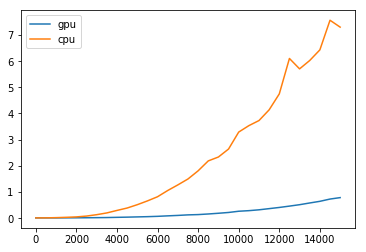

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.plot(i_set, gpu_set, label = 'gpu')
plt.plot(i_set, cpu_set, label = 'cpu')
plt.legend()

In [13]:
#g=performanceTest("/gpu:0",7000)